International Labour Organization API with Python
=====

## Canada unemployment rate

*December 14, 2019*<br>
*@bd_econ*

-----


ILO API Documentation is [here](https://www.ilo.org/ilostat-files/Documents/SDMX_User_Guide.pdf)


In [1]:
import requests
import pandas as pd

#### Parameters / Settings

In [2]:
base = 'https://www.ilo.org/sdmx/rest/data/ILO,'
series = 'DF_STI_ALL_UNE_DEA1_SEX_AGE_RT'
country = 'CAN'
freq = 'M'
start = '2005-01-01'
details = f'?format=jsondata&startPeriod={start}&detail=dataonly'

url = f'{base}{series}/.{country}.{freq}....{details}'

In [3]:
# Request data from API
r = requests.get(url)

# Did the request work?
if r.status_code == 200:
    print('Request status: Success!')
    result = r.json()
else:
    print('Request status: Failure')

Request status: Success!


#### Print series information

In [4]:
print(result['data']['structure']['name']['en'])
print('Description:')
print(result['data']['structure']['description']['en'])

series = result['data']['structure']['dimensions']['series']
obs = result['data']['structure']['dimensions']['observation'][0]['values']
dates = [pd.to_datetime(o['start']) for o in obs]
for s in series:
    print(f'Key position: {s["keyPosition"]}')
    for i, v in enumerate(s['values']):
        print(f"{v['name']['en']}: {i}")

Unemployment rate by sex and age, seasonally adjusted series (Sub-annual)
Description:
The unemployment rate is the number of persons who are unemployed as a percent of the total number of employed and unemployed persons (i.e., the labour force).
Key position: 0
Short term indicators: 0
Key position: 1
Canada: 0
Key position: 2
Monthly: 0
Key position: 3
Labour Force Survey: 0
Key position: 4
Unemployment rate, seasonally adjusted series: 0
Key position: 5
Female: 0
Male: 1
Total: 2
Key position: 6
15+: 0
15-64: 1
15-24: 2
15-24: 3
Total: 4
25-54: 5
55-64: 6


Data returned by the API need to be matched with two things. First, the specific series of interest based on the keys above, for example, `0:0:0:0:0:2:4` represents the total (men and women) for all age groups. Next, the datapoint needs to be mapped to its corresponding date. Dates are returned by the API in the same order as the datapoints.

In [9]:
data_vals = result['data']['dataSets'][0]['series']
data = data_vals['0:0:0:0:0:2:4']['observations']
key_vals = [str(k) for k in sorted([int(i) for i in data.keys()])]
final = [data[k][0] for k in key_vals]

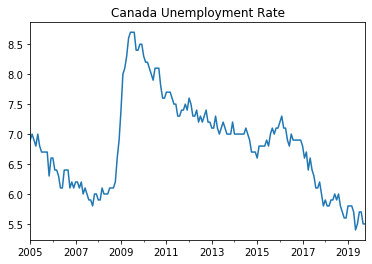

In [10]:
%matplotlib inline
title = 'Canada Unemployment Rate'
pd.Series(data=final, index=dates).sort_index().plot(title=title);